In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts

In [2]:
data = pd.read_csv("1.csv")

In [6]:
mask = data['I[A]'] > 11
MNK = sts.linregress(data['I[A]'][mask], data['P[Wt]'][mask])
x = np.linspace(0, 15, 1000)
y = MNK.slope * x + MNK.intercept
print("Наклон: ",MNK.slope)

Наклон:  0.4855983772819473


<>:6: SyntaxWarning: invalid escape sequence '\p'
<>:6: SyntaxWarning: invalid escape sequence '\p'
<>:6: SyntaxWarning: invalid escape sequence '\p'
<>:6: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_17978/919326778.py:6: SyntaxWarning: invalid escape sequence '\p'
  label = f'Наилучшая прямая a = {MNK.slope:.2f} $\pm$ {MNK.stderr:.2f}\nb = {MNK.intercept:.2f} $\pm$ {MNK.intercept_stderr:.2f}')
/tmp/ipykernel_17978/919326778.py:6: SyntaxWarning: invalid escape sequence '\p'
  label = f'Наилучшая прямая a = {MNK.slope:.2f} $\pm$ {MNK.stderr:.2f}\nb = {MNK.intercept:.2f} $\pm$ {MNK.intercept_stderr:.2f}')


Text(0, 0.5, 'Мощность [Вт]')

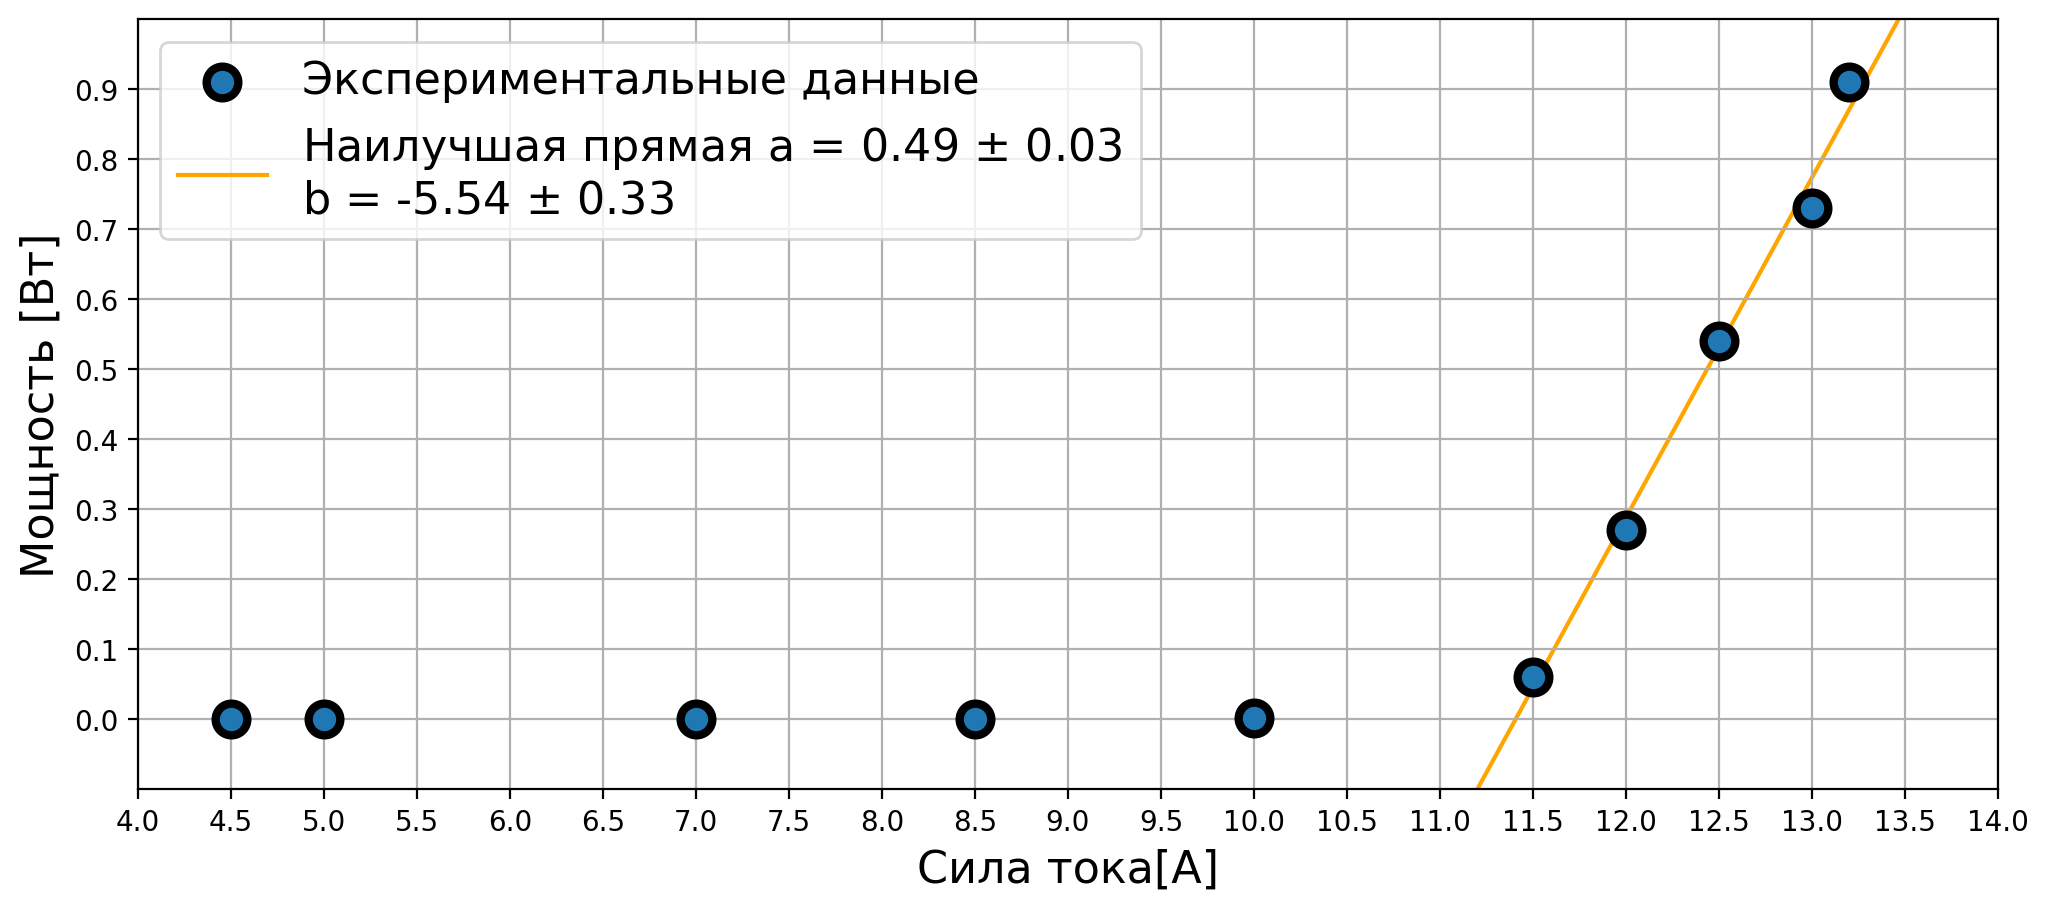

In [25]:
plt.figure(figsize = (12, 5), dpi = 200)
plt.scatter(data["I[A]"], data['P[Wt]'], s = 130, edgecolors='black', linewidths=3, zorder = 9, label = 'Экспериментальные данные')
plt.plot(x, y, 
         color = 'orange', 
         zorder = 1,
         label = f'Наилучшая прямая a = {MNK.slope:.2f} $\pm$ {MNK.stderr:.2f}\nb = {MNK.intercept:.2f} $\pm$ {MNK.intercept_stderr:.2f}')
plt.xticks(np.arange(0, 15, 0.5))
plt.yticks(np.arange(0, 1, 0.1))
plt.xlim(4, 14)
plt.ylim(-0.1, 1)
plt.legend(fontsize = 16)
plt.grid()
plt.xlabel("Сила тока[А]", fontsize = 16)
plt.ylabel("Мощность [Вт]", fontsize = 16)

### Пик

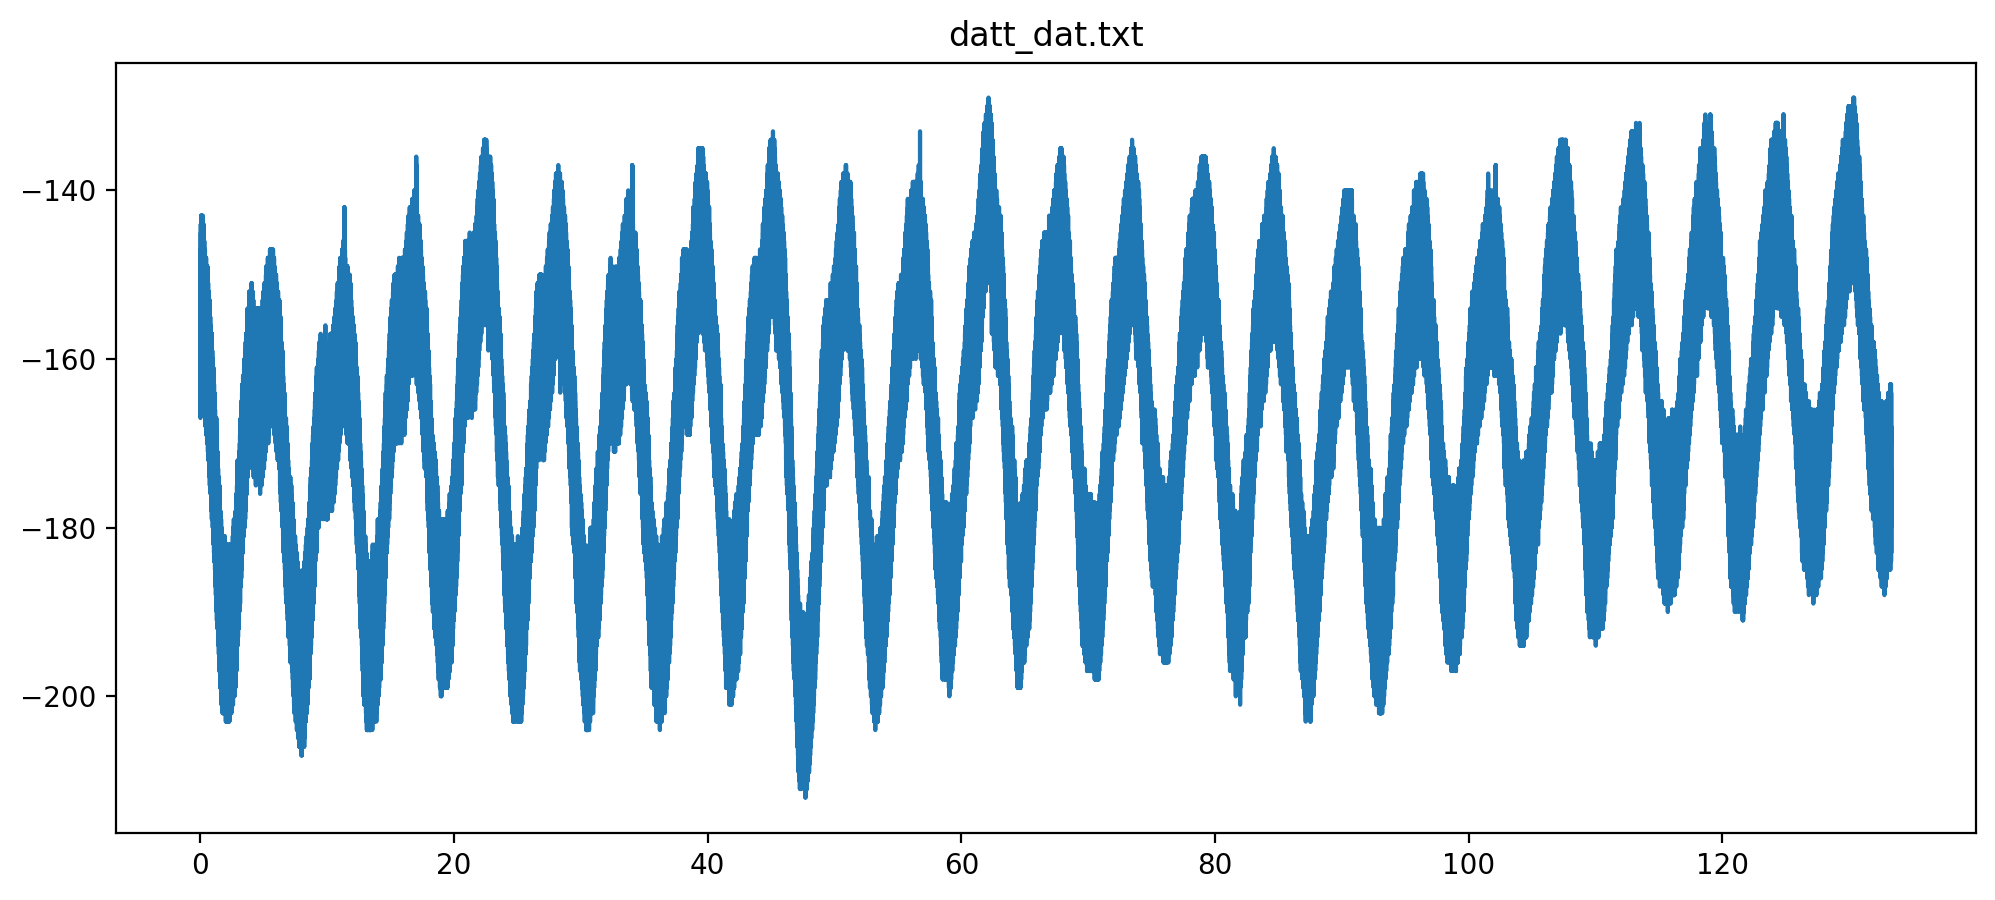

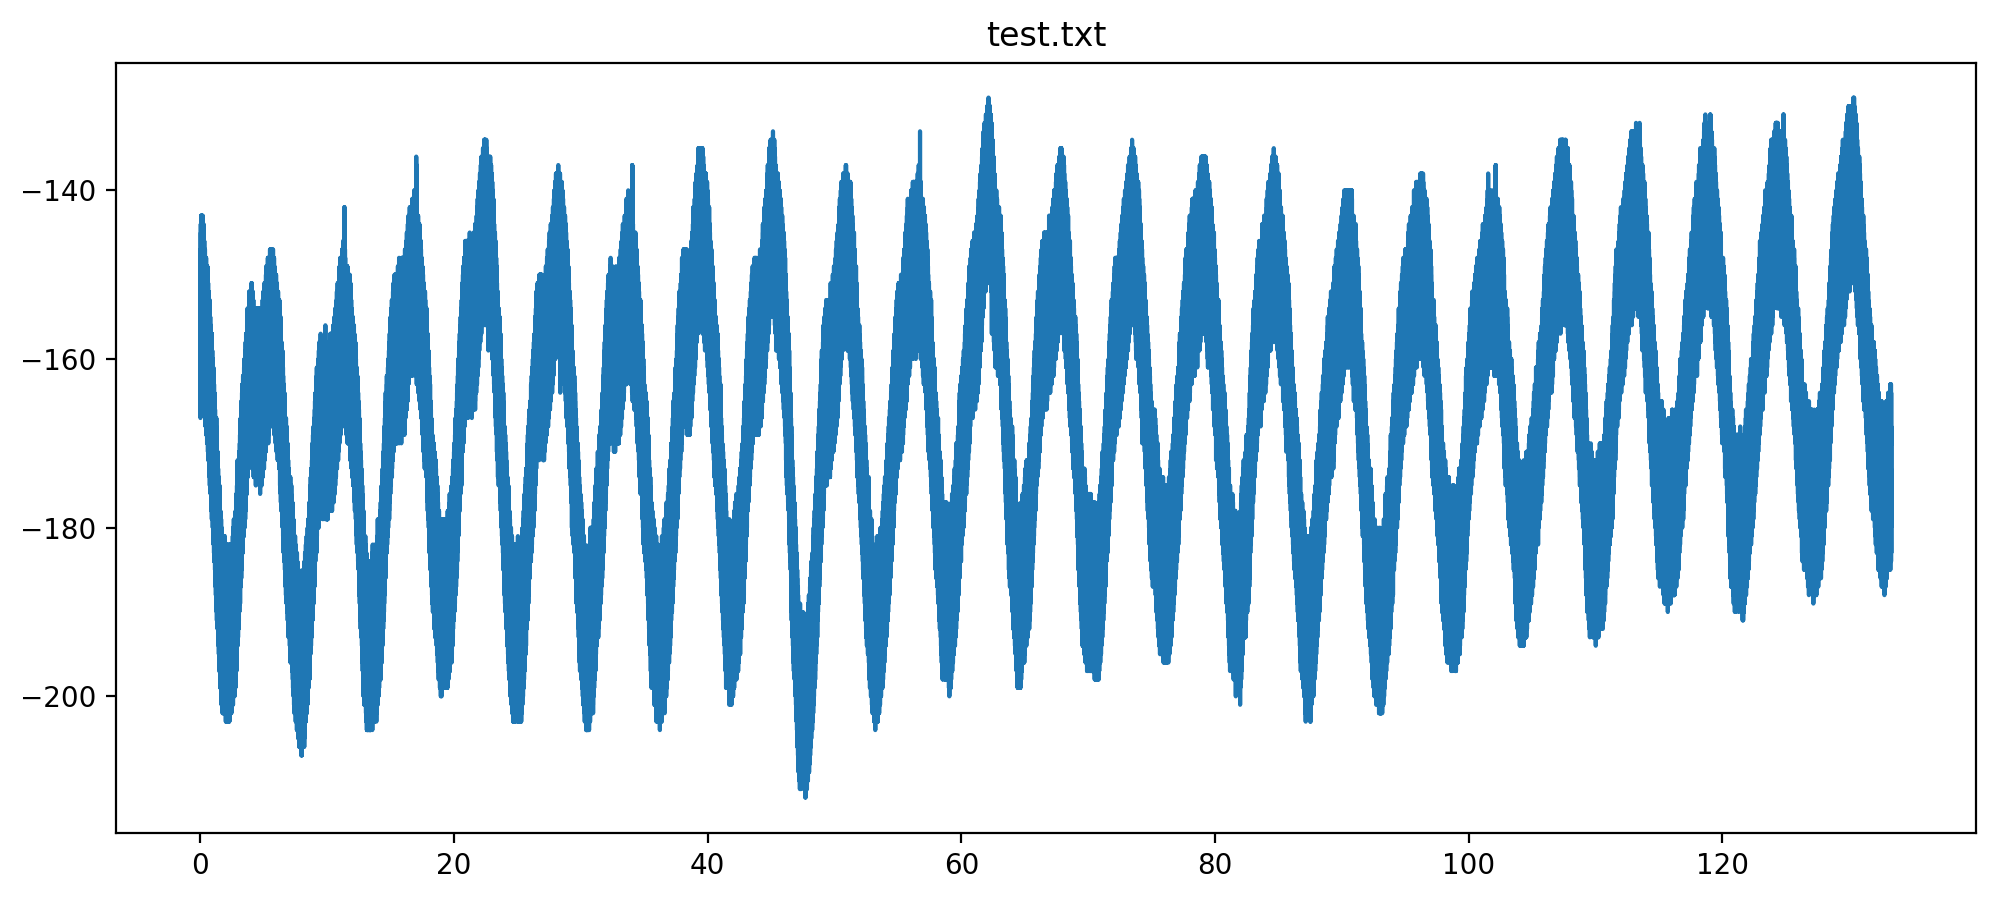

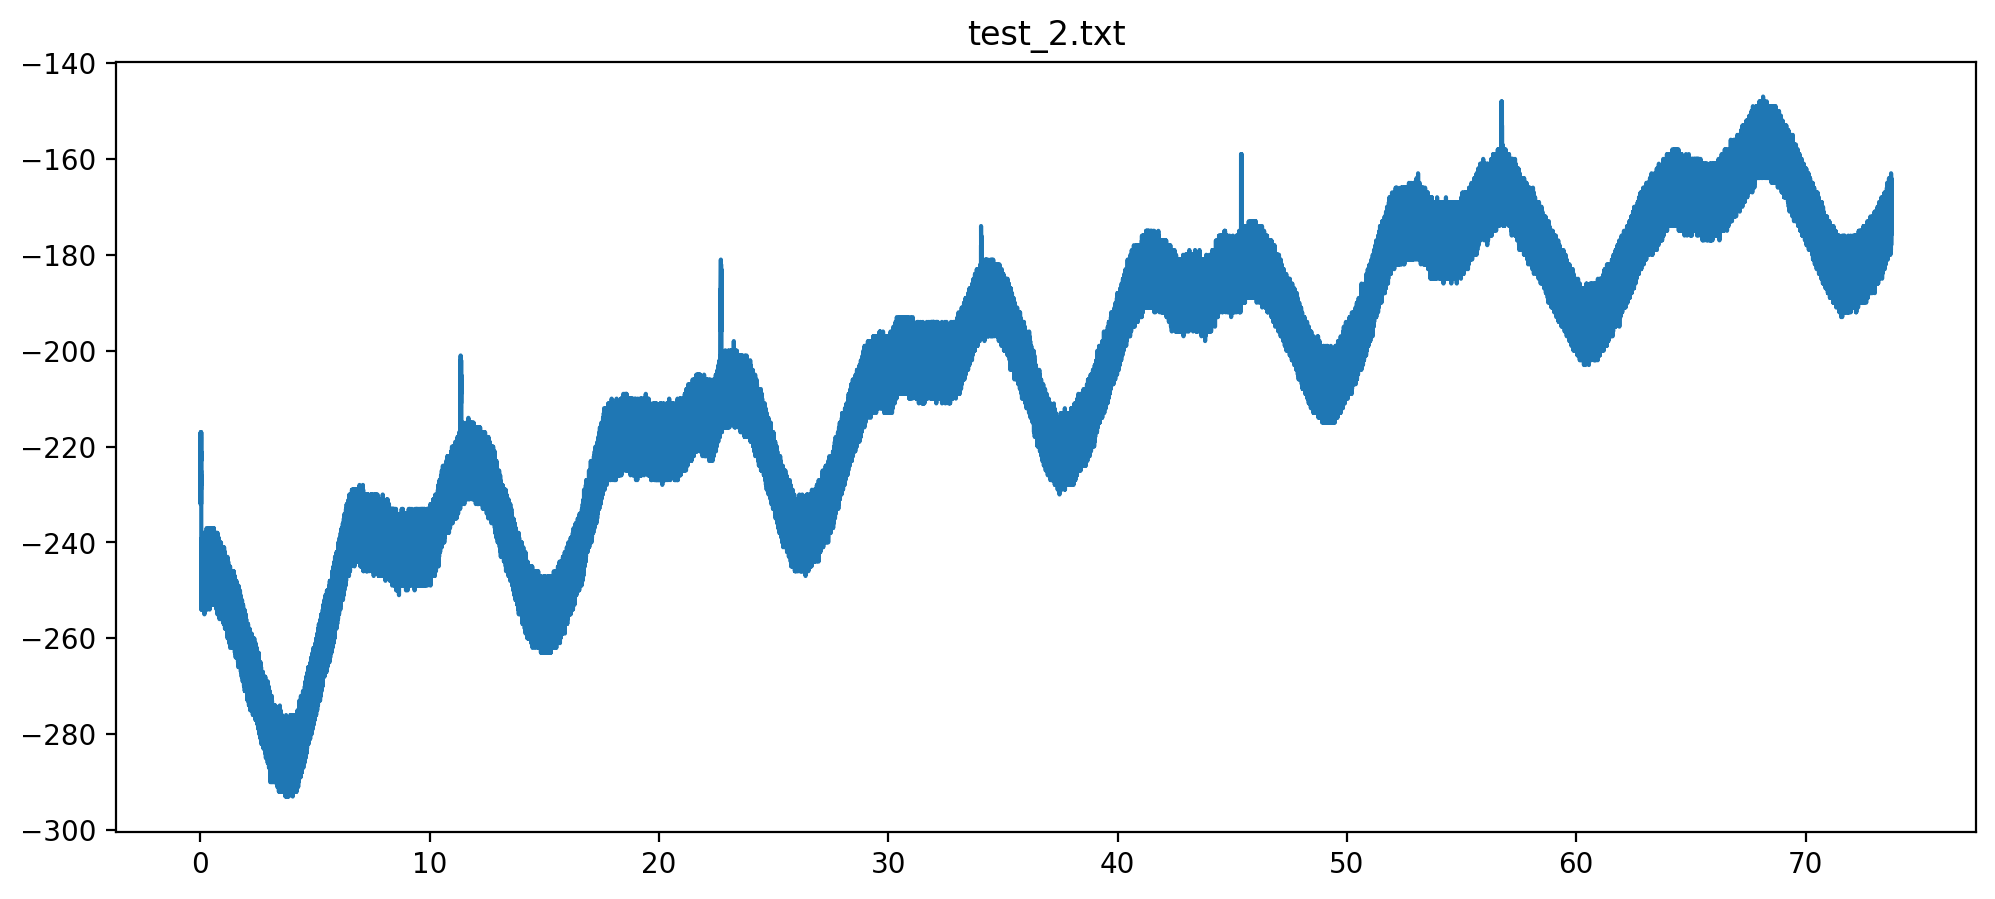

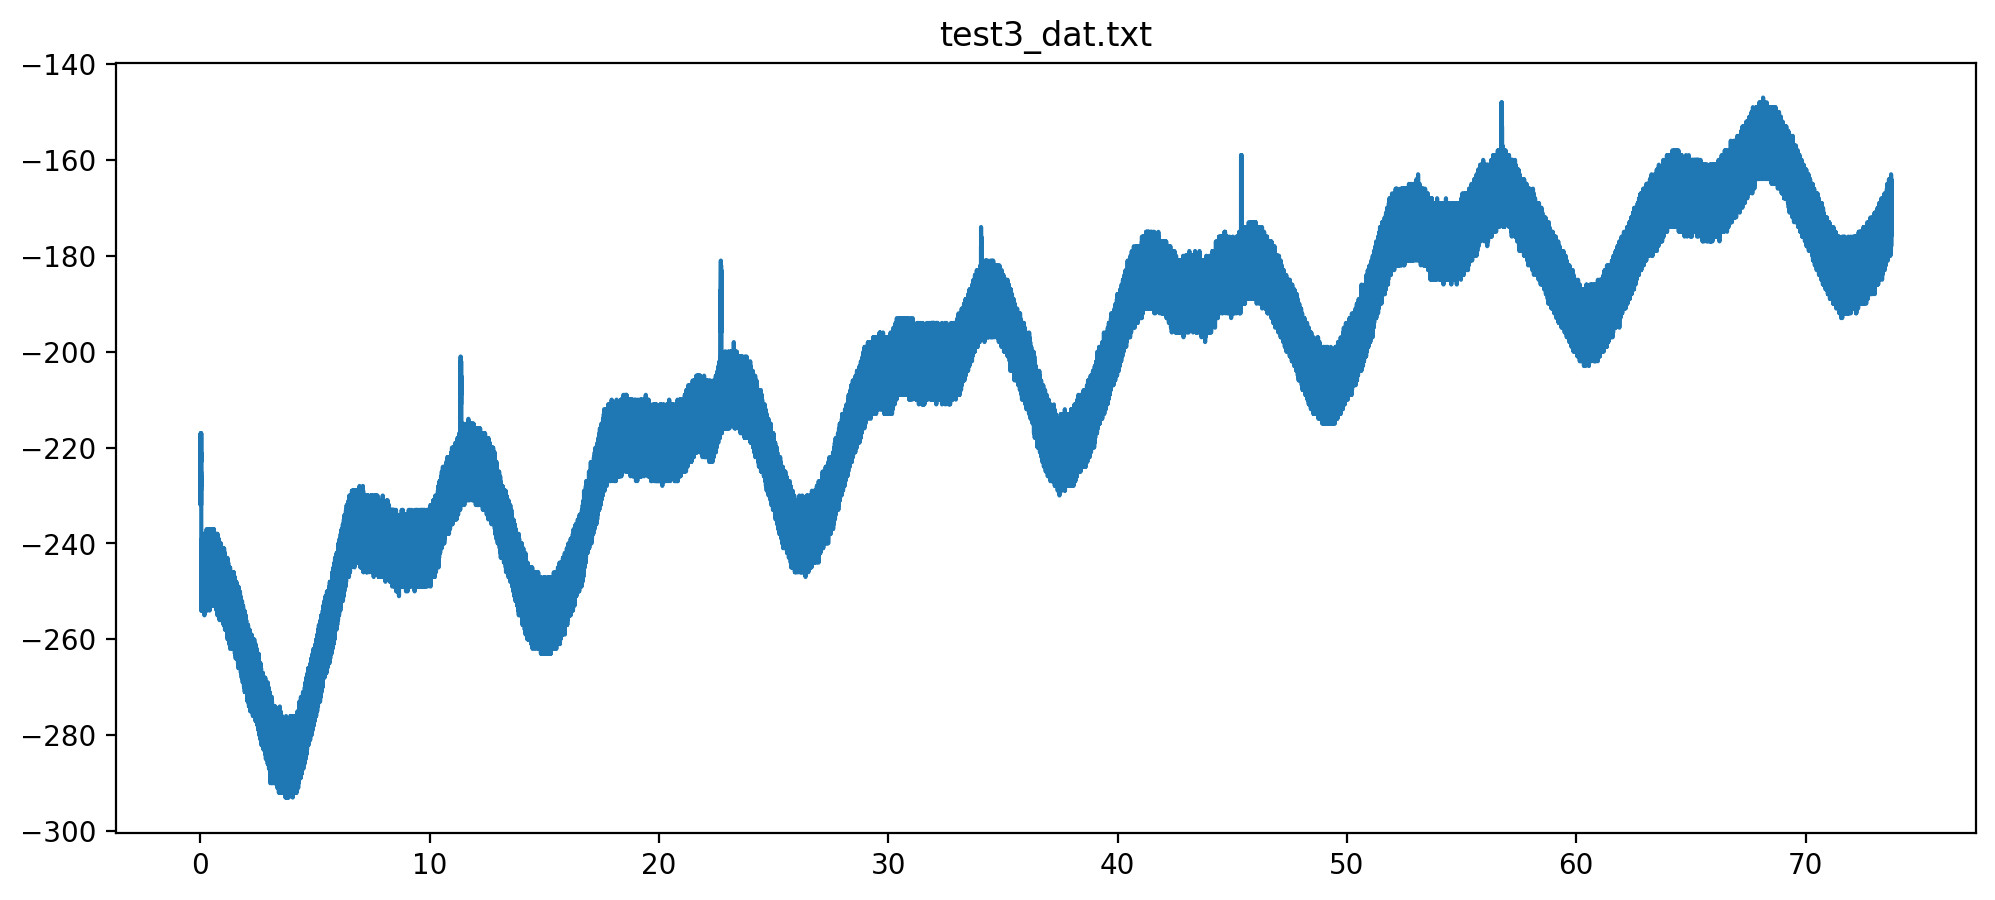

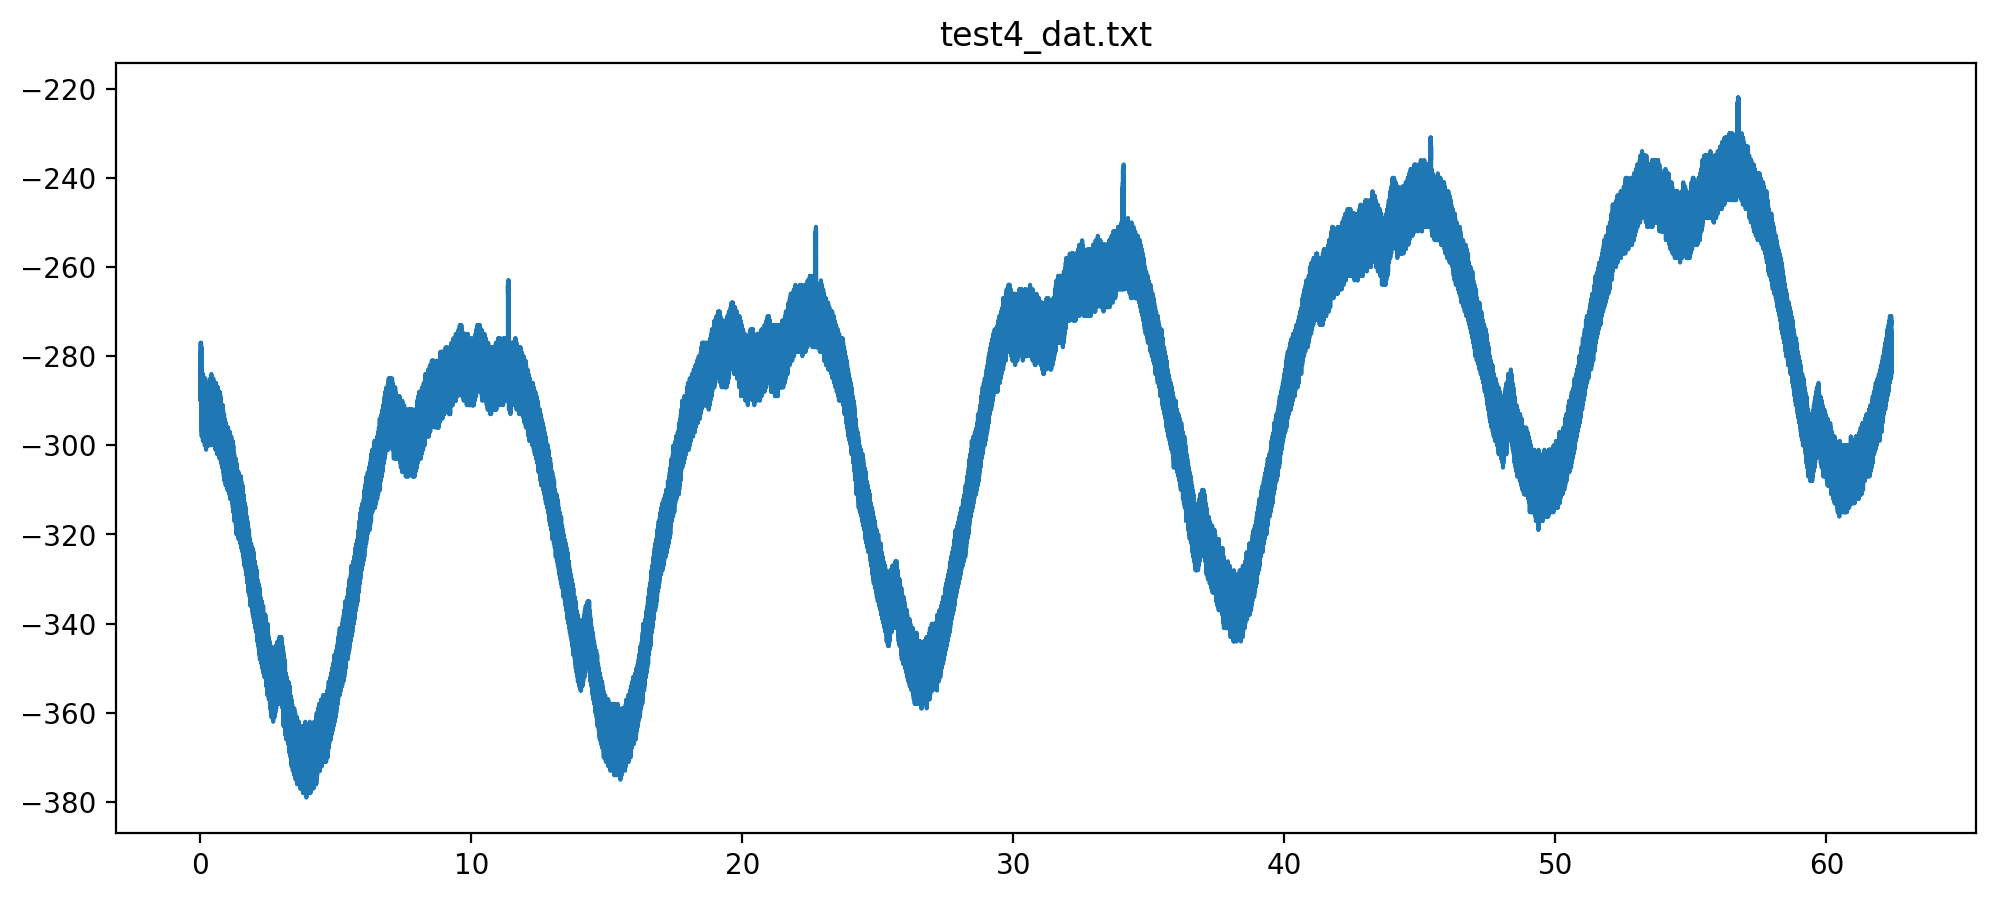

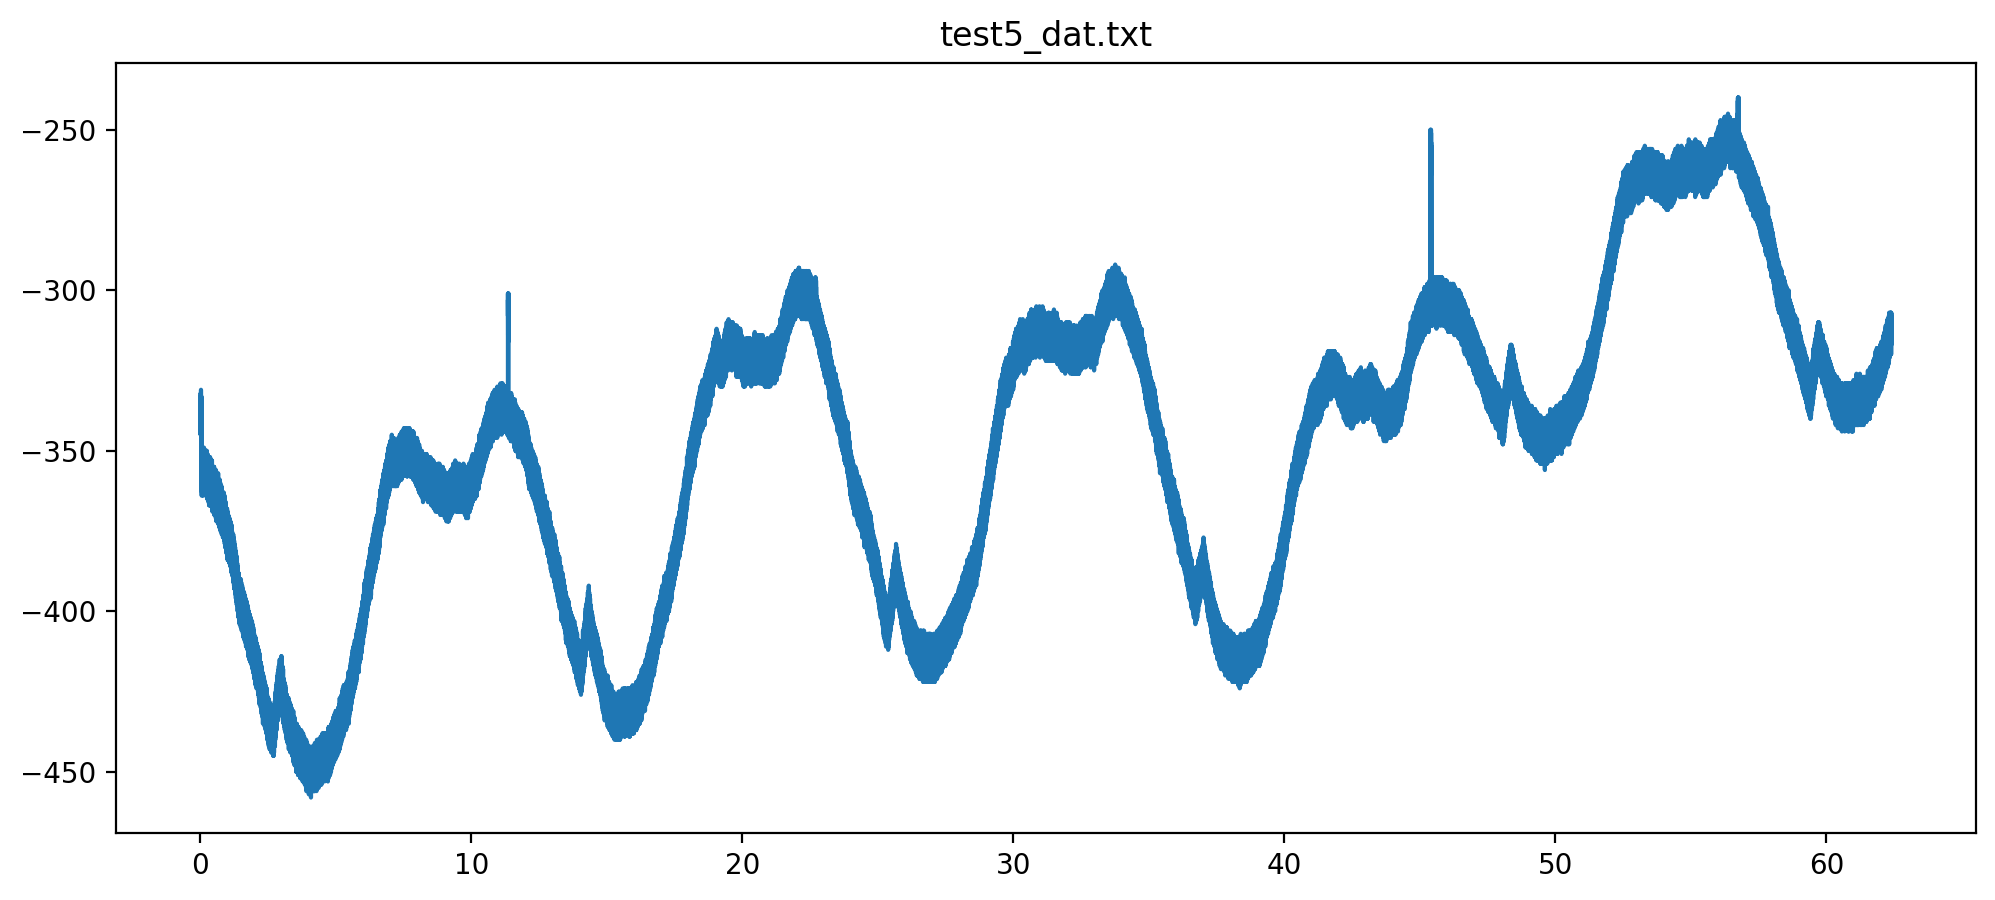

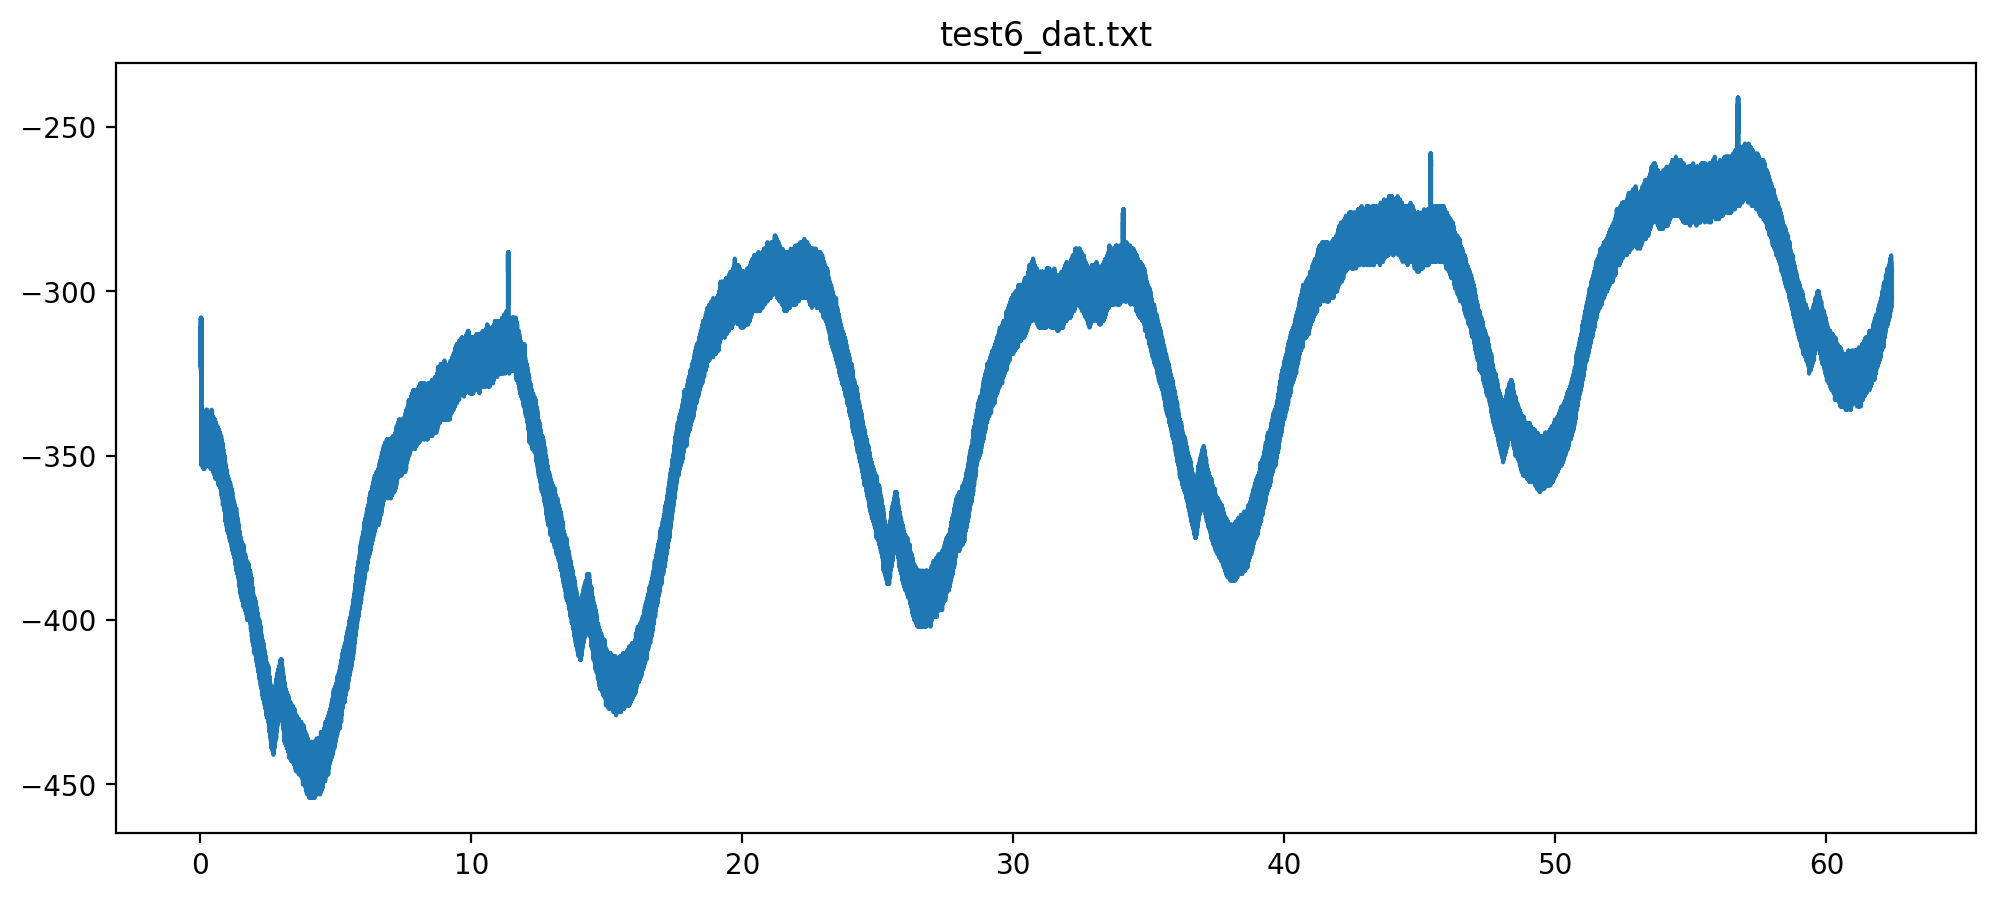

In [7]:
filenames = ['datt_dat.txt', 
             'test.txt', 
             'test_2.txt', 
             'test3_dat.txt', 
             'test4_dat.txt', 
             'test5_dat.txt', 
             'test6_dat.txt']
sampling_rate = 44 * 1e3
for file in filenames:
    data = np.loadtxt(file)
    plt.figure(figsize = (12, 5), dpi = 200)
    plt.title(file)

    time = np.arange(len(data)) / sampling_rate
    plt.plot(time, data)